In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [5]:
malicious = pd.read_excel("maliciousornot.xlsx")
data = malicious.copy()

In [6]:
data.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [7]:
data.shape

(548, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

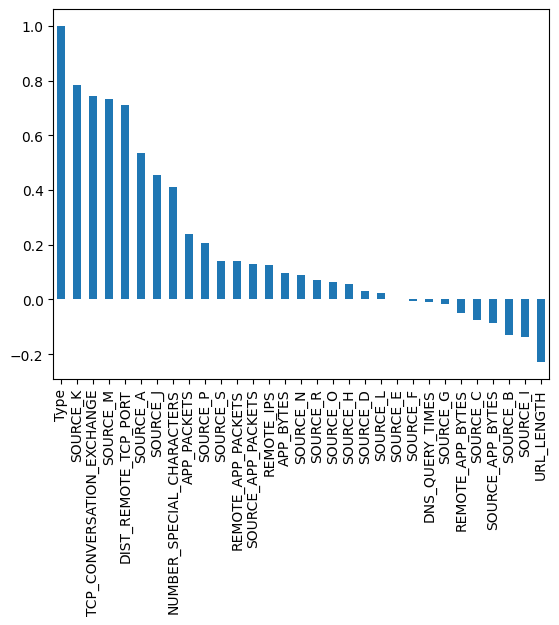

In [9]:
df.corr()["Type"].sort_values(ascending=False).plot(kind="bar");

In [11]:
X = df.drop("Type", axis=1).values
y = df[["Type"]]
X.shape, y.shape

((548, 30), (548, 1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=24)

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [75]:
earlyStop = EarlyStopping(monitor="val_loss", mode="min", patience=25, verbose=1)

In [84]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dropout(.6))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(.6))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(.6))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [85]:
model.fit(x=X_train, y=y_train, epochs=700, validation_data=(X_test, y_test), callbacks=[earlyStop])

Epoch 1/700
13/13 [==============================] - 1s 10ms/step - loss: 0.7053 - val_loss: 0.6834
Epoch 2/700
13/13 [==============================] - 0s 3ms/step - loss: 0.7052 - val_loss: 0.6806
Epoch 3/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6866 - val_loss: 0.6774
Epoch 4/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6809 - val_loss: 0.6743
Epoch 5/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6800 - val_loss: 0.6721
Epoch 6/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6789 - val_loss: 0.6716
Epoch 7/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6690 - val_loss: 0.6700
Epoch 8/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6704 - val_loss: 0.6682
Epoch 9/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6748 - val_loss: 0.6680
Epoch 10/700
13/13 [==============================] - 0s 3ms/step - loss: 0.6670 - val_loss: 0.6665
Epoch 11

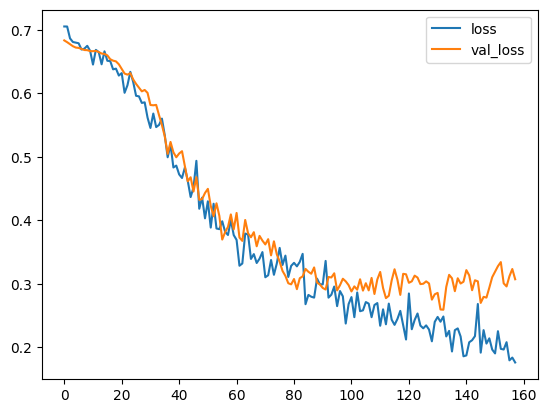

In [86]:
loss = pd.DataFrame(model.history.history)
loss.plot();

In [87]:
model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 928us/step - loss: 0.0775


0.0774507224559784

In [88]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.3072


0.3072411119937897

In [92]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [94]:
# Çoklu sınıflandırma için:
# y_pred = np.argmax(model.predict(X_test), axis=-1)

In [95]:
accuracy_score(y_test, y_pred)

0.927007299270073

In [97]:
confusion_matrix(y_test, y_pred)

array([[76,  2],
       [ 8, 51]], dtype=int64)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        78
           1       0.96      0.86      0.91        59

    accuracy                           0.93       137
   macro avg       0.93      0.92      0.92       137
weighted avg       0.93      0.93      0.93       137

